<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/%5B20241122%5D%20Hybrid%20LR-Bi-LSTM%20with%20hybrid%20adversarial%20attack%20FGSM-PGD%20based%20on%20UNSW-NB15%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hybrid LR-Bi-LSTM with hybrid adversarial attack FGSM-PGD based on UNSW-NB15 dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.utils import np_utils

from keras.optimizers import Adam
#from keras.utils import np_utils
from keras.regularizers import l2
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Adversarial Training Imports
from keras import backend as K

In [2]:
# Load dataset
dataset = pd.read_csv("Dataset_10Classes.csv")
dataset = dataset.dropna() # Remove missing values
#X = dataset.drop(['Class'], axis=1)
#y = dataset['Class']

In [3]:
dataset.isnull().sum()

,0
ID_Cb,0
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 47 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID_Cb              257673 non-null  int64  
 1   id                 257673 non-null  int64  
 2   dur                257673 non-null  float64
 3   proto              257673 non-null  object 
 4   service            257673 non-null  object 
 5   state              257673 non-null  object 
 6   spkts              257673 non-null  int64  
 7   dpkts              257673 non-null  int64  
 8   sbytes             257673 non-null  int64  
 9   dbytes             257673 non-null  int64  
 10  rate               257673 non-null  float64
 11  sttl               257673 non-null  int64  
 12  dttl               257673 non-null  int64  
 13  sload              257673 non-null  float64
 14  dload              257673 non-null  float64
 15  sloss              257673 non-null  int64  
 16  dl

### **Data Preprocessing**

In [5]:
# Identify categorical features
categorical_features = dataset.select_dtypes(include=['object']).columns

In [6]:
# Encode categorical features
for feature in categorical_features:
    encoder = LabelEncoder()
    dataset[feature] = encoder.fit_transform(dataset[feature])

# Separate features and target
X = dataset.drop(['Class'], axis=1)
y = dataset['Class']

In [7]:
# Data Preprocessing
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y, num_classes=10)  # update to 10 classes

X = X.values
print(X.shape)
print(y.shape)

(257673, 46)
(257673, 10)


In [ ]:
#encoder = LabelEncoder()
#y = encoder.fit_transform(dataset['Class'])
#y = np_utils.to_categorical(y, num_classes=10)  # update to 10 classes
#X = dataset.drop(['Class'], axis=1)
#X = X.values
#print(X.shape)
#print(y.shape)

In [8]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### **Hybrid combination of LR-Bi-LSTM for 10 class classifications**

In [9]:
from sklearn.linear_model import LinearRegression
#from tensorflow.keras.utils import to_categorical

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Extract features from Linear Regression predictions
train_lr_features = lr_model.predict(X_train)
test_lr_features = lr_model.predict(X_test)

# Reshape features for LSTM input
train_lr_features = np.reshape(train_lr_features, (train_lr_features.shape[0], 1, train_lr_features.shape[1]))
test_lr_features = np.reshape(test_lr_features, (test_lr_features.shape[0], 1, test_lr_features.shape[1]))

# Print shapes to verify
print(train_lr_features.shape)
print(test_lr_features.shape)

(206138, 1, 10)
(51535, 1, 10)


In [11]:
!pip install tensorflow
import tensorflow as tf

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.9315 - loss: 0.2662 - val_accuracy: 0.9992 - val_loss: 0.0028
Epoch 2/150
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9998 - val_loss: 6.7956e-04
Epoch 3/150
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.9999 - loss: 4.9230e-04 - val_accuracy: 0.9999 - val_loss: 4.0326e-04
Epoch 4/150
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - accuracy: 0.9999 - loss: 4.2606e-04 - val_accuracy: 0.9999 - val_loss: 3.1628e-04
Epoch 5/150
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.9999 - loss: 2.6145e-04 - val_accuracy: 1.0000 - val_loss: 3.8088e-04
Epoch 6/150
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 1.0000 - loss: 1.5393e-04 - val_accuracy: 1.0000 - val_loss: 2.1137e-04
Epoch 7/150
5154/5154 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - accuracy: 0.9999 - loss: 2.2437e-04 - val_accuracy: 0.9999 - val_loss: 3.2141e-04
Epoch 8/150
5154/5154 ━━━━━━━━━━

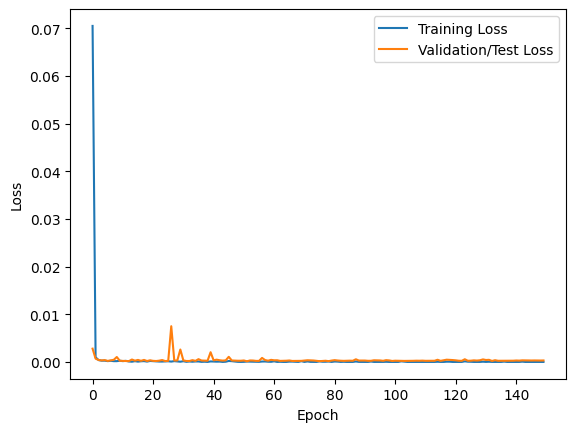

In [12]:
# Define the Bi-LSTM model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(1, train_lr_features.shape[2])))
bi_lstm_model.add(Bidirectional(LSTM(32)))
bi_lstm_model.add(Dense(10, activation='softmax'))

bi_lstm_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Function to generate adversarial examples using FGSM
def generate_fgsm_adversarial_examples(model, x, y_true, epsilon=0.01):
    x_tensor = tf.convert_to_tensor(x)
    with tf.GradientTape() as tape:
        tape.watch(x_tensor)
        predictions = model(x_tensor)
        loss = tf.keras.losses.categorical_crossentropy(y_true, predictions)
    gradients = tape.gradient(loss, x_tensor)
    signed_gradients = tf.sign(gradients)
    adversarial_examples = x + epsilon * signed_gradients.numpy()
    return np.clip(adversarial_examples, 0, 1)

# Function to generate adversarial examples using PGD
def generate_pgd_adversarial_examples(model, x, y_true, epsilon=0.01, alpha=0.01, iterations=40):
    x_adv = np.copy(x)
    for _ in range(iterations):
        x_adv_fgsm = generate_fgsm_adversarial_examples(model, x_adv, y_true)
        x_adv += alpha * np.sign(x_adv_fgsm - x_adv)  # Step in the direction of the adversarial example
        x_adv = np.clip(x_adv, 0, 1)  # Ensure values are within valid range
    return x_adv

# Generate adversarial examples for training using FGSM and PGD
x_train_fgsm = generate_fgsm_adversarial_examples(bi_lstm_model, train_lr_features, y_train)
x_train_pgd = generate_pgd_adversarial_examples(bi_lstm_model, train_lr_features, y_train)

# Combine original and adversarial examples for training
x_combined_train = np.concatenate((train_lr_features, x_train_fgsm), axis=0)
y_combined_train = np.concatenate((y_train, y_train), axis=0)  # Duplicate labels for adversarial examples

# Train the Bi-LSTM model with combined data
history = bi_lstm_model.fit(x_combined_train, y_combined_train,
                             epochs=50,
                             batch_size=64,
                             validation_split=0.2)

# Evaluate hybrid model on test set
test_bi_lstm_predictions = bi_lstm_model.predict(test_lr_features)
test_bi_lstm_predictions_classes = np.argmax(test_bi_lstm_predictions, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(np.argmax(y_test, axis=1), test_bi_lstm_predictions_classes)
print("Accuracy:", accuracy)

print(classification_report(np.argmax(y_test, axis=1), test_bi_lstm_predictions_classes))

# Plot training/validation loss over each epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation/Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# Calculate metrics
y_true = np.argmax(y_test, axis=1)  # True labels
y_pred = test_bi_lstm_predictions_classes  # Predicted labels

# Accuracy, Precision, Recall, F1-Score (weighted and per class)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)

# Print metrics for each class
print(f"Accuracy: {accuracy:.20f}")
for i in range(len(precision)):
    print(f"Class {i}:")
    print(f"  Precision: {precision[i]:.20f}")
    print(f"  Recall:    {recall[i]:.20f}")
    print(f"  F1-Score:  {f1[i]:.20f}")

Accuracy: 1.00000000000000000000
Class 0:
  Precision: 1.00000000000000000000
  Recall:    1.00000000000000000000
  F1-Score:  1.00000000000000000000
Class 1:
  Precision: 1.00000000000000000000
  Recall:    1.00000000000000000000
  F1-Score:  1.00000000000000000000
Class 2:
  Precision: 1.00000000000000000000
  Recall:    1.00000000000000000000
  F1-Score:  1.00000000000000000000
Class 3:
  Precision: 1.00000000000000000000
  Recall:    1.00000000000000000000
  F1-Score:  1.00000000000000000000
Class 4:
  Precision: 1.00000000000000000000
  Recall:    1.00000000000000000000
  F1-Score:  1.00000000000000000000
Class 5:
  Precision: 1.00000000000000000000
  Recall:    1.00000000000000000000
  F1-Score:  1.00000000000000000000
Class 6:
  Precision: 1.00000000000000000000
  Recall:    1.00000000000000000000
  F1-Score:  1.00000000000000000000
Class 7:
  Precision: 1.00000000000000000000
  Recall:    1.00000000000000000000
  F1-Score:  1.00000000000000000000
Class 8:
  Precision: 1.0000000

In [16]:
# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, digits=8))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display confusion matrix as text
print("\nConfusion Matrix:\n")
print(conf_matrix)


Classification Report:

              precision    recall  f1-score   support

           0  1.00000000 1.00000000 1.00000000     18390
           1  1.00000000 1.00000000 1.00000000       555
           2  1.00000000 1.00000000 1.00000000       468
           3  1.00000000 1.00000000 1.00000000      3403
           4  1.00000000 1.00000000 1.00000000      9040
           5  1.00000000 1.00000000 1.00000000      4949
           6  1.00000000 1.00000000 1.00000000     11630
           7  1.00000000 1.00000000 1.00000000      2749
           8  1.00000000 1.00000000 1.00000000       317
           9  1.00000000 1.00000000 1.00000000        34

    accuracy                      1.00000000     51535
   macro avg  1.00000000 1.00000000 1.00000000     51535
weighted avg  1.00000000 1.00000000 1.00000000     51535


Confusion Matrix:

[[18390     0     0     0     0     0     0     0     0     0]
 [    0   555     0     0     0     0     0     0     0     0]
 [    0     0   468     0     0  

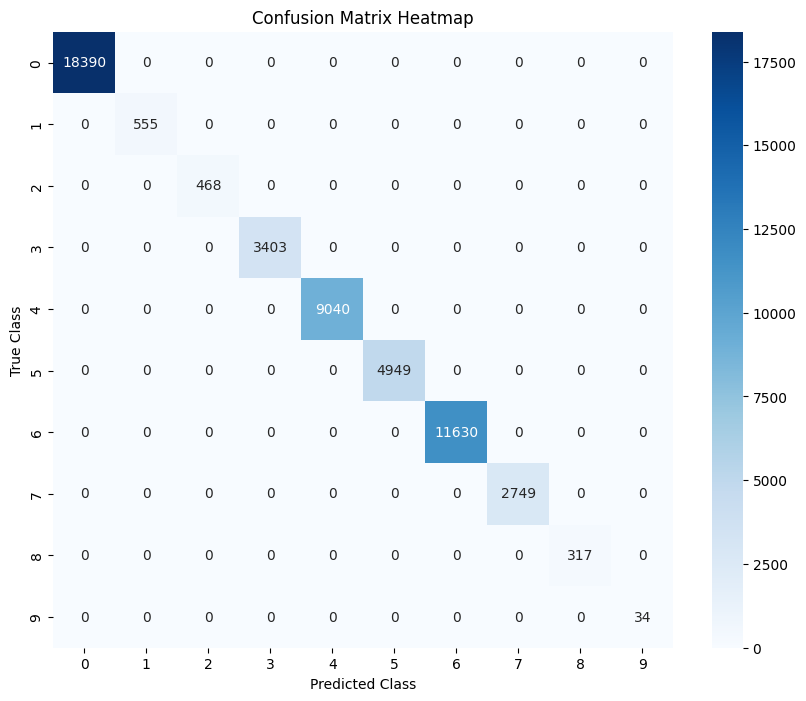

In [18]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(conf_matrix.shape[0]), yticklabels=range(conf_matrix.shape[0]))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix Heatmap')
plt.show()